# 2023 人工智慧 HW1
### 引入套件 先把資料處理要用的套件引入
* 分析
1. Numpy
2. Pandas
3. Scipy
* 視覺化
1. Matplotlib
2. Plotly
3. Seaborn    

In [96]:
import pandas as pd # 載入pandas 套件 命名引用名稱:pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc # 用於之後做T-test
import seaborn as sns
import plotly.express as px

#-----------------------------------------------------------------------------------------------------------
#可以一次顯示出jupyter全部的output
#來自https://stackoverflow.com/questions/36786722/how-to-display-full-output-in-jupyter-not-only-last-result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#------------------------------------------------------------------------------------------------------------

* ### 讀入資料
* ### 查看前十筆資料看有沒有錯誤
* ### 查看每個 column 的資料型態

In [97]:
rowdata = pd.read_csv('./diabetes.csv')
rowdata.head(10)
rowdata.dtypes

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

* ### 查看資料筆數

0    500
1    268
Name: Outcome, dtype: int64

<Axes: ylabel='Outcome'>

Text(0.5, 1.0, 'Outcome')

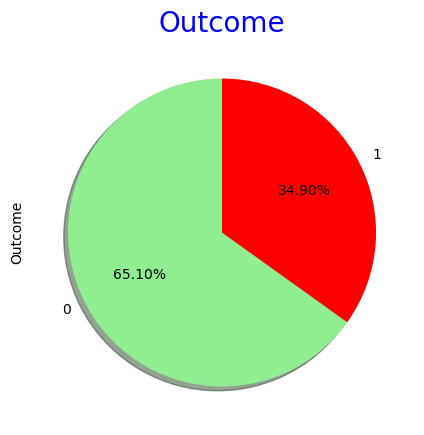

In [98]:
rowdata['Outcome'].value_counts()
colors = ["lightgreen", "red"]
rowdata["Outcome"].value_counts().plot(
    kind="pie", #圖形類別: 圓餅圖
    shadow=True, #圓餅圖要不要有陰影
    startangle=90,#設定圓餅圖角度
    figsize=(5, 5),#設定圖形的大小
    autopct="%1.2f%%",
    colors=colors,
)
plt.title("Outcome", fontsize=20, color="blue")

確認所有Outcome都是1、0，沒有雜訊


* ### 把每一列的資訊圖成畫，觀察每個資料的線型

<Figure size 2000x1000 with 0 Axes>

<Axes: xlabel='Pregnancies', ylabel='Count'>

Text(0.5, 0, 'Pregnancies')

<Axes: xlabel='Glucose', ylabel='Count'>

Text(0.5, 0, 'Glucose')

<Axes: xlabel='BloodPressure', ylabel='Count'>

Text(0.5, 0, 'BloodPressure')

<Axes: xlabel='SkinThickness', ylabel='Count'>

Text(0.5, 0, 'SkinThickness')

<Axes: xlabel='Insulin', ylabel='Count'>

Text(0.5, 0, 'Insulin')

<Axes: xlabel='BMI', ylabel='Count'>

Text(0.5, 0, 'BMI')

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

Text(0.5, 0, 'DiabetesPedigreeFunction')

<Axes: xlabel='Age', ylabel='Count'>

Text(0.5, 0, 'Age')

<Axes: xlabel='Outcome', ylabel='Count'>

Text(0.5, 0, 'Outcome')

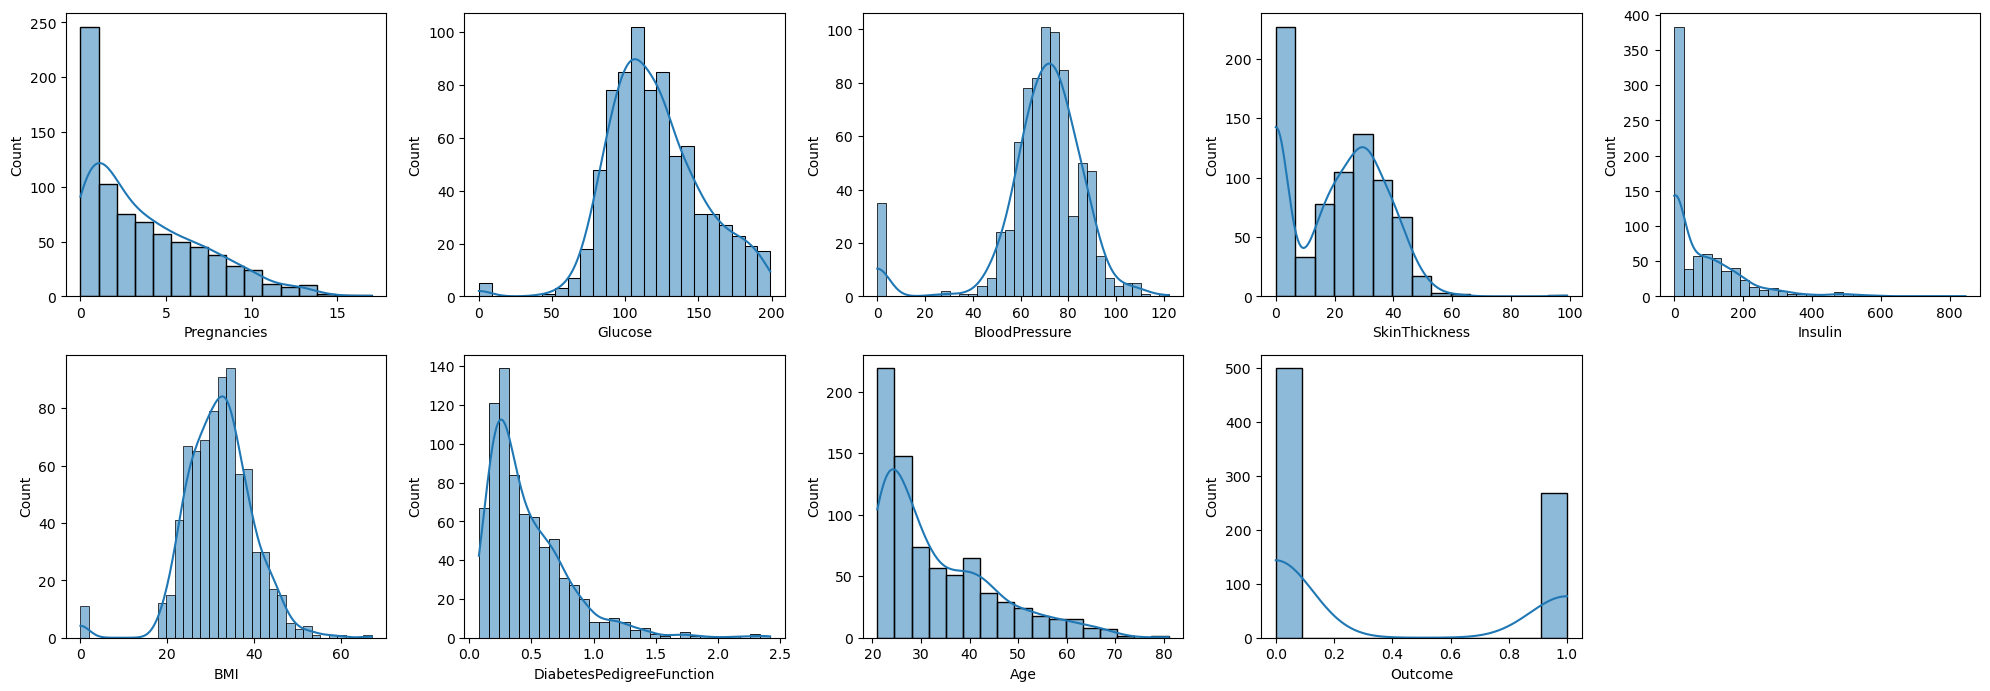

In [99]:
plt.figure(figsize = (20,10))
plot_number = 1
num_cols = [col for col in rowdata.columns if rowdata[col].dtype != 'object'] 
for column in num_cols:
    if plot_number <= 14:
        ax = plt.subplot(3, 5, plot_number)
        sns.histplot(rowdata[column], kde = True)
        plt.xlabel(column)
        
    plot_number += 1

plt.tight_layout()
plt.show()

* ### 藉由小提琴圖觀察：各項指標在有無得病的人群中，有無變化

In [100]:
def violin(col) :
    fig = px.violin(rowdata, y=col, x="Outcome", color="Outcome", box=True, template = 'plotly_dark')
    return fig.show()

for col in num_cols :
    if(col == 'Outcome') :
        continue
    violin(col)

由上面的圖表中可以得知，與是否得病明顯可能有關的是： Pregnancies, Glucose, Insulin, BMI, DiabetesPedigreeFunction, Age
## 下面進行特微工程
* ### 察看有無缺失值

In [101]:
rowdata.isnull().sum(axis = 0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

沒有缺失值
* ### 察看資料型態

In [102]:
rowdata.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

* ### 把有無得病的數據分開，方便之後做t-test

In [103]:
#--------------------------------------
#來自https://sparkbyexamples.com/pandas/how-to-split-pandas-dataframe/
grouped = rowdata.groupby('Outcome')
group1 = grouped.get_group(1)
group2 = grouped.get_group(0)
#--------------------------------------

* ### 用**t-test**檢測，在有無得病的人群中，各項數據是否有顯著差異

In [104]:
#------------------------------------------------------------------------------------------------------------------------------------------------------------
#來自https://peilee-98185.medium.com/t-%E6%AA%A2%E5%AE%9A-with-python-443c2364b071
def t_test(group1, group2):
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)
    std1 = np.std(group1)
    std2 = np.std(group2)
    nobs1 = len(group1)
    nobs2 = len(group2)
    
    modified_std1 = np.sqrt(np.float32(nobs1)/
                    np.float32(nobs1-1)) * std1
    modified_std2 = np.sqrt(np.float32(nobs2)/
                    np.float32(nobs2-1)) * std2
    statistic, pvalue = sc.stats.ttest_ind_from_stats(mean1 = mean1, std1 = modified_std1, nobs1 = nobs1, mean2 = mean2, std2 = modified_std2, nobs2 = nobs2)
    return statistic, pvalue
#--------------------------------------------------------------------------------------------------------------------------------------------------------------

for col in num_cols :
    if(col == 'Outcome') :
        continue
    statistic, pvalue = t_test(group1[col], group2[col])
    print(col, ": \n\tt statistic :", statistic, "\n\tp value :",  pvalue, end = "")
    string = " < 0.05" if pvalue < 0.05 else " >= 0.05"
    print(string)



Pregnancies : 
	t statistic : 6.298430746308315 
	p value : 5.065121201817035e-10 < 0.05
Glucose : 
	t statistic : 14.600060459545738 
	p value : 8.93538514042515e-43 < 0.05
BloodPressure : 
	t statistic : 1.804702357491721 
	p value : 0.07151389135934565 >= 0.05
SkinThickness : 
	t statistic : 2.0747002604862326 
	p value : 0.0383476988615383 < 0.05
Insulin : 
	t statistic : 3.644325504162463 
	p value : 0.00028618633295577955 < 0.05
BMI : 
	t statistic : 8.471840197603148 
	p value : 1.2298050760682617e-16 < 0.05
DiabetesPedigreeFunction : 
	t statistic : 4.885826613108591 
	p value : 1.2546060691080491e-06 < 0.05
Age : 
	t statistic : 6.792688271705752 
	p value : 2.2099725692773062e-11 < 0.05


除了BloodPressure 外，其他的資料在正常人和病人間都有顯著的差異，和我們一開始的觀察有出入，SkinThickness也是一個有顯著差異的特徵
* ### 區分**特徵欄位**與**預測目標欄位**:

In [105]:
data = rowdata.drop(['Outcome', 'BloodPressure'], axis = 1)
label = rowdata['Outcome']
data.head()
label.head()

Pregnancies  Glucose  SkinThickness  Insulin   BMI  \
0            6      148             35        0  33.6   
1            1       85             29        0  26.6   
2            8      183              0        0  23.3   
3            1       89             23       94  28.1   
4            0      137             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

* ### 將資料清整完畢，下面進行模型開發

In [106]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

* ### 選擇模型

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

Bias :  [0.07548683034384192, 0.06887485479308297, 0.09170754801406017, 0.05430122082088106, 0.06341144964253363]
Variance :  [0.0753903902057981, 0.06793249279374684, 0.09019139229001316, 0.05405821805960584, 0.06328196531303387]
平均訓練誤差 :  0.15921666552096264
平均測試誤差 :  0.16732686582768455


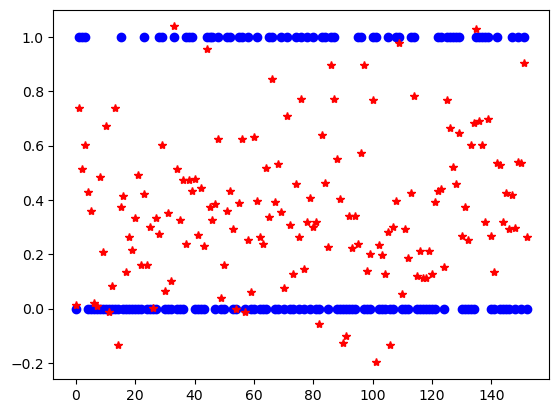

In [107]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

linear_test_bias = []
linear_test_variance = []
linear_train_errors = []
linear_test_errors = []

for train_index, test_index in kf.split(data) :
    x_train, y_train = data.iloc[train_index], label.iloc[train_index]
    x_test, y_test = data.iloc[test_index], label.iloc[test_index]

    linear_model.fit(x_train, y_train)

    linear_y_train_pred = linear_model.predict(x_train)
    linear_y_test_pred = linear_model.predict(x_test)

    bias = np.mean((linear_y_test_pred - np.mean(y_test)) ** 2)
    variance = np.var(linear_y_test_pred)

    linear_test_bias.append(bias)
    linear_test_variance.append(variance)

    train_error = np.sum((linear_y_train_pred - y_train) ** 2) / len(linear_y_train_pred)
    test_error = np.sum((linear_y_test_pred - y_test) ** 2) / len(linear_y_test_pred)

    linear_train_errors.append(train_error)
    linear_test_errors.append(test_error)
    
print("Bias : ", linear_test_bias)
print("Variance : ", linear_test_variance)
print("平均訓練誤差 : ", sum(linear_train_errors) / len(linear_train_errors))
print("平均測試誤差 : ", sum(linear_test_errors) / len(linear_test_errors))
x = np.arange(0, len(y_test), 1)
plt.plot(x, y_test, "bo", x, linear_y_test_pred, "r*")


LogisticRegression(max_iter=1000)

LogisticRegression(max_iter=1000)

LogisticRegression(max_iter=1000)

LogisticRegression(max_iter=1000)

LogisticRegression(max_iter=1000)

Bias :  [0.2277365491651206, 0.1994012481025468, 0.21087029853263622, 0.18257934982271776, 0.20850954760989363]
Variance :  [0.2276943835385394, 0.19834710743801653, 0.19227525721032215, 0.17642786962279464, 0.19616386859754792]
平均訓練誤差 :  0.22526204284844148
平均測試誤差 :  0.23436889907478142


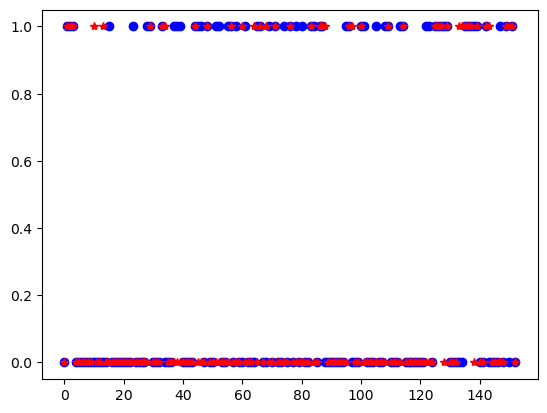

In [108]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(solver='lbfgs', max_iter=1000)

logistic_test_bias = []
logistic_test_variance = []
logistic_train_errors = []
logistic_test_errors = []

for train_index, test_index in kf.split(data) :
    x_train, y_train = data.iloc[train_index], label.iloc[train_index]
    x_test, y_test = data.iloc[test_index], label.iloc[test_index]

    logistic_model.fit(x_train, y_train)

    logistic_y_train_pred = logistic_model.predict(x_train)
    logistic_y_test_pred = logistic_model.predict(x_test)

    bias = np.mean((logistic_y_test_pred - np.mean(y_test)) ** 2)
    variance = np.var(logistic_y_test_pred)

    logistic_test_bias.append(bias)
    logistic_test_variance.append(variance)

    train_error = np.sum((logistic_y_train_pred - y_train) ** 2) / len(logistic_y_train_pred)
    test_error = np.sum((logistic_y_test_pred - y_test) ** 2) / len(logistic_y_test_pred)

    logistic_train_errors.append(train_error)
    logistic_test_errors.append(test_error)

print("Bias : ", logistic_test_bias)
print("Variance : ", logistic_test_variance)
print("平均訓練誤差 : ", sum(logistic_train_errors) / len(logistic_train_errors))
print("平均測試誤差 : ", sum(logistic_test_errors) / len(logistic_test_errors))
plt.plot(x, y_test, "bo", x, logistic_y_test_pred, "r*")
